## Sleep Disorder Prediction

### Problem Statement

- Model can be used to predict the presence or absence of a sleep disorder
- The aim is to predict and understand sleep disorders using Machine Learning algorithms
- Sleep disorders impacts people by affecting their physical and mental health.
- Model will be to give valuable insights of the factors contributing to sleep disorders.
- Based on the requirement and data given, We deployed ML algorithms- Random Forest, KNN, SVM, Logistic Regression 
- Features such as age, sleep duration, quality of sleep, physical activity level, and stress level are considered to accurately predict sleep disorders.

### Dataset Information

Features present in the Dataset:
1. Person ID: A unique identifier for each individual.
2. Gender: Male or female.
3. Age: In years.
4. Occupation: The person's job or profession.
5. Sleep Duration: The number of hours the person sleeps per day.
6. Quality of Sleep: A subjective rating of the quality of sleep, on a scale of 1 to 10.
7. Physical Activity Level: The number of minutes the person engages in physical activity daily.
8. Stress Level: A subjective rating of the stress level experienced by the person, on a scale of 1 to 10.
9. BMI Category: The person's BMI category, such as underweight, normal, or overweight.
10. Blood Pressure: The person's blood pressure, as measured by systolic pressure over diastolic pressure.
11. Heart Rate: The person's resting heart rate, in beats per minute.
12. Daily Steps: The number of steps the person takes per day.
13. Sleep Disorder: The presence or absence of a sleep disorder, such as insomnia or sleep apnea.

### Import the data

In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the Dataset
df = pd.read_csv(r'C:\Users\hp\Downloads\Sleep_health_and_lifestyle_dataset.csv')

### Pre-processing

In [3]:
# display the DataFrame
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.drop('Person ID', axis=1, inplace=True)

In [6]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
df.shape

(374, 12)

In [8]:
df.describe(include="all")

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,374
unique,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,3
top,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,None
freq,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,219
mean,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


### Observations
The following inferences can be made:
- The Blood Pressure column can be separated into two columns, SYS (systolic blood pressure) and DIA (diastolic blood pressure) for ease of understanding
- The categorical data Gender, Occupation, BMI Category, and Sleep Disorder can be converted to numerical values using the LabelEncoder function.
- Blood pressure is a number,but its data type is object.We have to convert it into numeric.
- 374 observations are present in the data set.Comparatively smaller dataset.

### Cleaning the Data

In [9]:
#Seprate two columns, SYS (systolic blood pressure) and DIA (diastolic blood pressure) from Blood Pressure column.
#Dropping Blood Pressure column after feature extraction.
df[['SYS', 'DIA']] = df['Blood Pressure'].str.split("/", expand = True)
df.drop('Blood Pressure', axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYS,DIA
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [10]:
df.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
SYS                         object
DIA                         object
dtype: object

In [11]:
# converted data type of SYS and DIA to numeric
df[['SYS', 'DIA']] = df[['SYS', 'DIA']].apply(pd.to_numeric)

In [12]:
df.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
SYS                          int64
DIA                          int64
dtype: object

In [13]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,SYS,DIA
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [14]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
SYS                        0
DIA                        0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  SYS                      374 non-null    int64  
 12  DIA                      374 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB


In [16]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'SYS', 'DIA'],
      dtype='object')

### Checking for Outliers

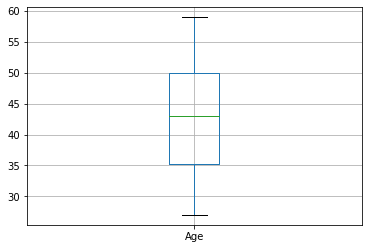

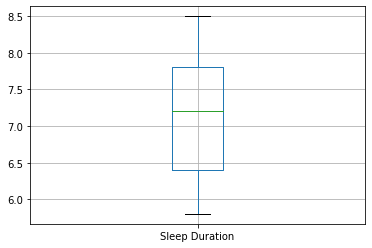

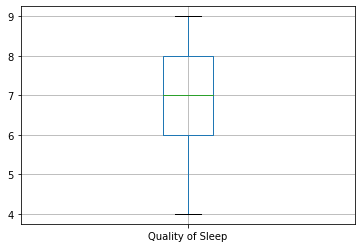

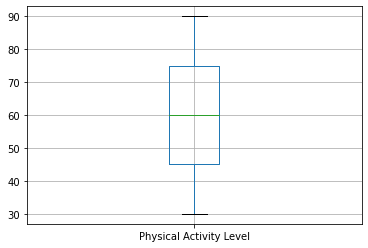

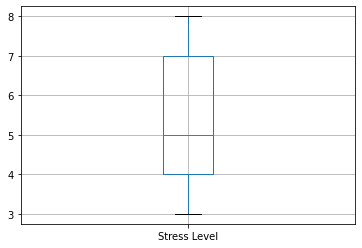

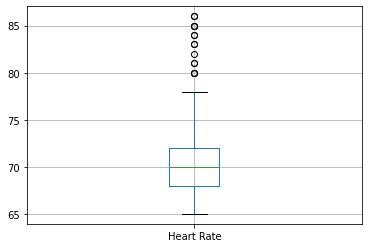

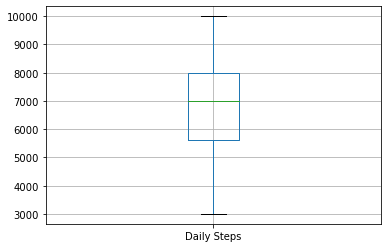

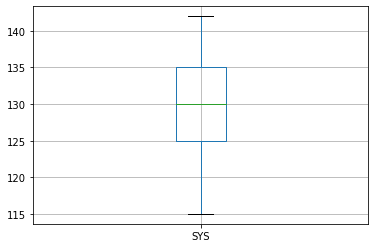

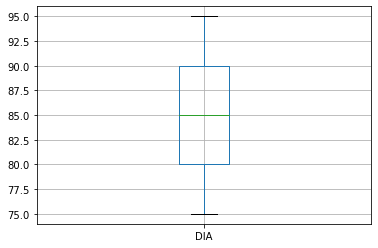

In [17]:
Categorical_Col = []
Numerical_Col = []

for i in df.columns:
    if df.dtypes[i]=="int32":
        Numerical_Col.append(i)
    if df.dtypes[i]=="float64":
        Numerical_Col.append(i)
    if df.dtypes[i]=="int64":
        Numerical_Col.append(i)
    else:
        Categorical_Col.append(i)


for i in Numerical_Col:
    df.boxplot(column=i)
    plt.show()

In [18]:
Numerical_Col

['Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'SYS',
 'DIA']

In [19]:
Categorical_Col

['Gender', 'Occupation', 'Sleep Duration', 'BMI Category', 'Sleep Disorder']

Age


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


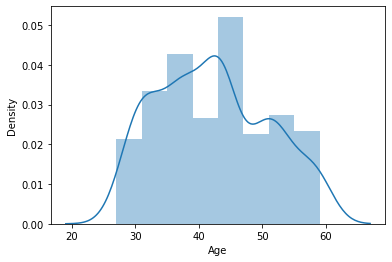

Sleep Duration


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


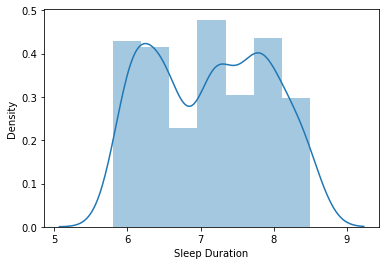

Quality of Sleep


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


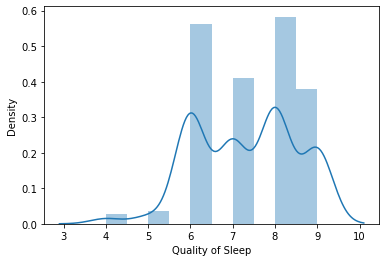

Physical Activity Level


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


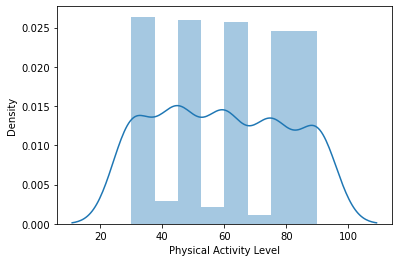

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Stress Level


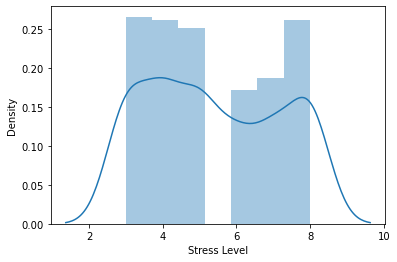

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Heart Rate


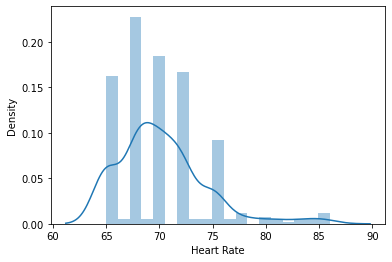

Daily Steps


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


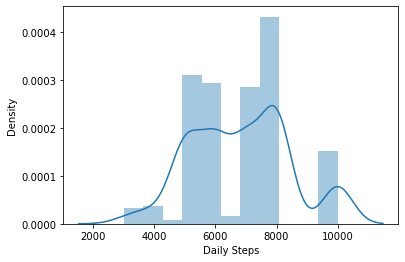

SYS


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


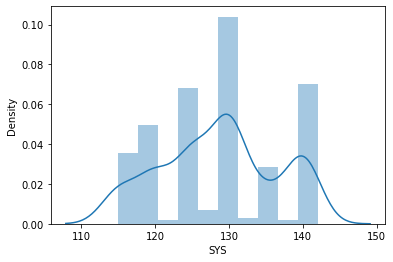

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


DIA


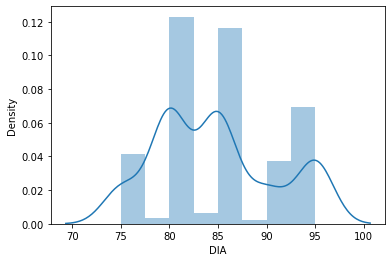

In [20]:
for i in Numerical_Col:
    print(i)
    sns.distplot(df[i])
    plt.show()

### Observations
- As we can see outliers is not present in the data
- Age variable noramally distributed

### Converting Categorical Variable into Numerical

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in Categorical_Col:
    df[col] = le.fit_transform(df[col])

In [22]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYS,DIA
0,1,27,9,3,6,42,6,3,77,4200,1,126,83
1,1,28,1,4,6,60,8,0,75,10000,1,125,80
2,1,28,1,4,6,60,8,0,75,10000,1,125,80
3,1,28,6,1,4,30,8,2,85,3000,2,140,90
4,1,28,6,1,4,30,8,2,85,3000,2,140,90


The following are the encodings for the categorical variables based on Alphabetical order:

**Gender:** 0 = Male, 1 = Female

**Occupation:**
0 = Accountant,
1 = Doctor,
2 = Engineer,
3 = Lawyer,
4 = Manager,
5 = Nurse,
6 = Sales Representative,
7 = Salesperson,
8 = Scientist,
9 = Software Engineer,
10 = Teacher

**BMI Category:**
0 = Underweight,
1 = Normal,
2 = Obese,
3 = Overweight

**Sleep Disorder:**
0 = Insomnia,
1 = None,
2 = Sleep Apnea

### Data Analysis Using Visualization 


- Exploratory Data Analysis

**countplot showing the number of people who have each type of sleep disorder.**

<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

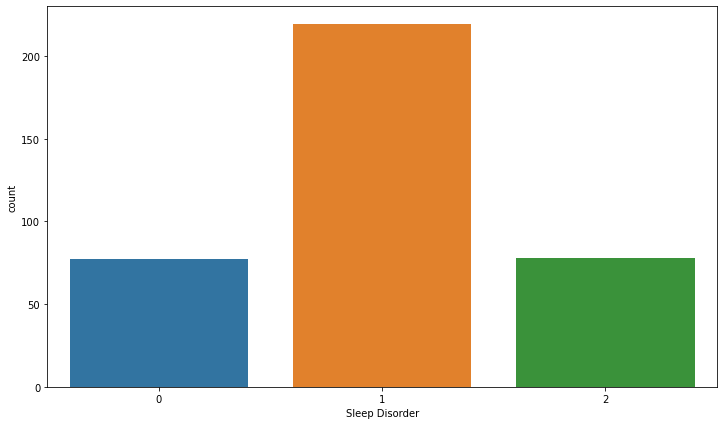

In [23]:
plt.figure(figsize=(12,7))
sns.countplot(x='Sleep Disorder', data=df)

**Pieplot showing the percentage of each type of sleep disorder.**

([<matplotlib.patches.Wedge at 0x1df7299f700>,
 [Text(-0.29213158045133886, 1.0604994765217959, '1'),
  Text(-0.4059676431676715, -1.0223454761972033, '2'),
  Text(0.8778190065969359, -0.6628980250816627, '0')],
 [Text(-0.159344498428003, 0.5784542599209795, '58.56%'),
  Text(-0.2214368962732753, -0.5576429870166563, '20.86%'),
  Text(0.4788103672346923, -0.3615807409536342, '20.59%')])

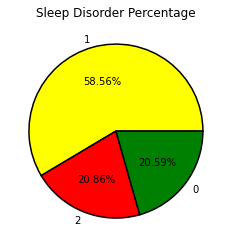

In [24]:
#To check data imabalance
databalance = df['Sleep Disorder'].value_counts()
plt.figure(figsize=(4,4))
plt.title("Sleep Disorder Percentage")
wedgeprops = {'linewidth': 1.5, 'edgecolor': 'black'}
plt.pie(databalance, labels=databalance.keys(), autopct="%.2f%%", colors=('Yellow', 'red','green'),wedgeprops=wedgeprops)

**Create a countplot to visualize the number of males and females 
by their Sleep Disorder status.**

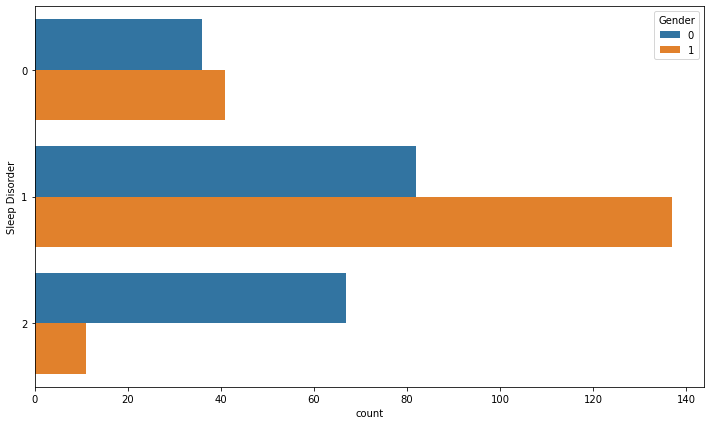

In [25]:
plt.figure(figsize=(12,7))
sns.countplot(y='Sleep Disorder',hue='Gender',data=df)
plt.show()

**Countplot to visualize the number of individuals in each BMI category by their Sleep Disorder status.**

<AxesSubplot:xlabel='BMI Category', ylabel='count'>

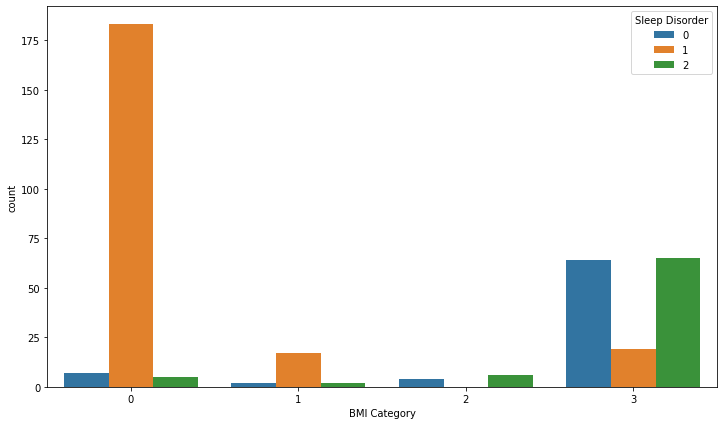

In [26]:
plt.figure(figsize=(12,7))
sns.countplot(x='BMI Category', hue='Sleep Disorder', data=df)

**Heatmap to visualize the relationships between the different variables.**

<AxesSubplot:>

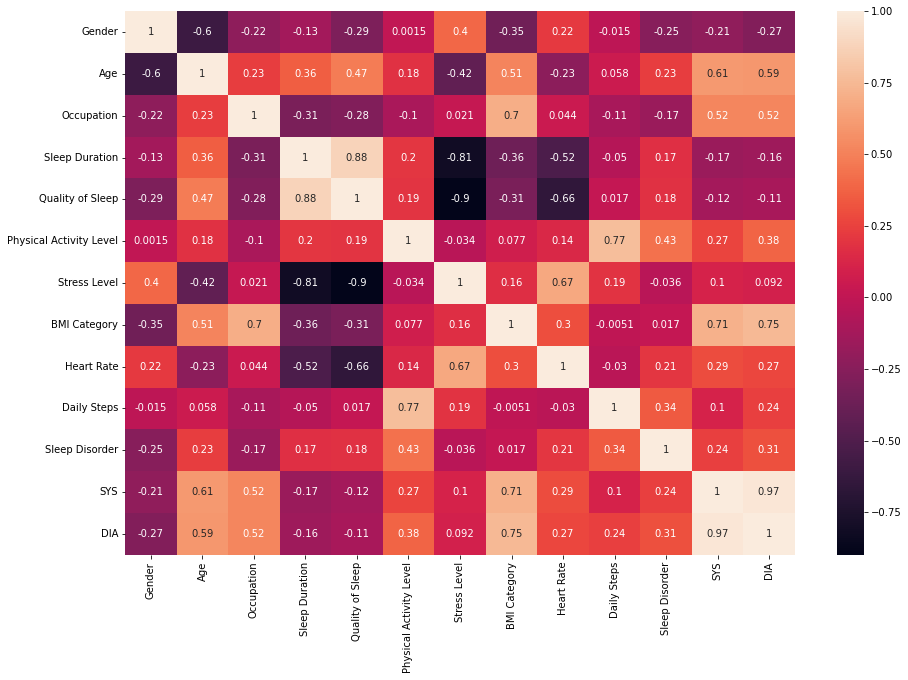

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

**Countplot to visualize the number of individuals in each occupation by their Sleep Disorder status.**

<AxesSubplot:xlabel='Occupation', ylabel='count'>

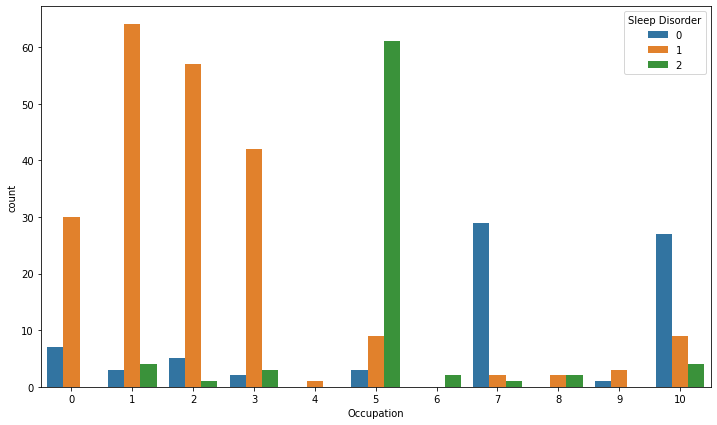

In [28]:
plt.figure(figsize=(12,7))
sns.countplot(x='Occupation', hue='Sleep Disorder', data=df)

- Occupation: 0 = Accountant, 1 = Doctor, 2 = Engineer, 3 = Lawyer, 4 = Manager, 5 = Nurse, 6 = Sales Representative, 7 = Salesperson, 8 = Scientist, 9 = Software Engineer, 10 = Teacher
- Sleep Disorder: 0 = Insomnia, 1 = None, 2 = Sleep Apnea

### Observations
- Using count plot Most people do not have a sleep disorder.
- Precentage of both Insomnia and Sleep Apnea is almost same.
- Men are more likely to have sleep disorders, especially sleep apnea, than Women.
- People with a lower body mass index (BMI) are less likely to have sleep disorders, while people with a higher BMI are more likely to have sleep apnea and insomnia.
- The heatmap shows that the feature with the strongest correlation with Sleep Disorder is Physical Activity Level, with a correlation coefficient of 0.43.
- From Countplot using occupation we can get insights that most of people having nursing occupations and Sales Representative suffers sleeping disorder mostly Sleep Apnea.
- Salesperson and Teacher shows high chances of Insomnia while Manager level people mostly dont have sleep disorder.

# Train & Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.iloc[:,:-1]
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYS
0,1,27,9,3,6,42,6,3,77,4200,1,126
1,1,28,1,4,6,60,8,0,75,10000,1,125
2,1,28,1,4,6,60,8,0,75,10000,1,125
3,1,28,6,1,4,30,8,2,85,3000,2,140
4,1,28,6,1,4,30,8,2,85,3000,2,140
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,22,9,75,3,3,68,7000,2,140
370,0,59,5,21,9,75,3,3,68,7000,2,140
371,0,59,5,22,9,75,3,3,68,7000,2,140
372,0,59,5,22,9,75,3,3,68,7000,2,140


In [31]:
Y = df['Sleep Disorder']
Y

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int32

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Model Selection

THIS IS A CLASSIFICATION PROBLEM
The algorithms which are capable to provide this required results are:
- Random forest
- KNN
- SVM
- Logistic Regression

### RandomForest

In [33]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred))

acc1 = accuracy_score(Y_test,Y_pred)
print("Accuracy of the Random Forest model:",acc1)

[[15  1  0]
 [ 0 43  0]
 [ 0  0 16]]
classification report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        16

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75

Accuracy of the Random Forest model: 0.9866666666666667


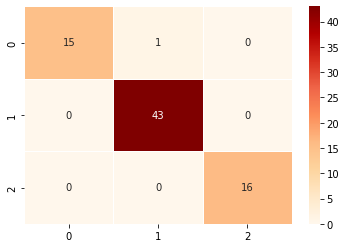

In [35]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap='OrRd', linecolor='white', linewidths=1, annot=True)
plt.show()

### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=25,metric="euclidean")

KNN.fit(X_train, Y_train)
Y_pred2 = KNN.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred2)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred2))

acc2 = accuracy_score(Y_test,Y_pred2)
print("Accuracy of the KNN model:",acc2)

[[13  2  1]
 [ 2 41  0]
 [ 1  3 12]]
classification report
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.89      0.95      0.92        43
           2       0.92      0.75      0.83        16

    accuracy                           0.88        75
   macro avg       0.88      0.84      0.85        75
weighted avg       0.88      0.88      0.88        75

Accuracy of the KNN model: 0.88


### SVM

In [38]:
from sklearn.svm import SVC
svc= SVC(kernel= 'rbf')
svc.fit(X_train, Y_train)
Y_pred3 = svc.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred3)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred3))

acc3 = accuracy_score(Y_test,Y_pred3)
print("Accuracy of the SVM model:",acc3)


# kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} 

[[ 1 14  1]
 [ 0 43  0]
 [ 1 11  4]]
classification report
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.63      1.00      0.77        43
           2       0.80      0.25      0.38        16

    accuracy                           0.64        75
   macro avg       0.64      0.44      0.42        75
weighted avg       0.64      0.64      0.55        75

Accuracy of the SVM model: 0.64


### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="liblinear")
lr.fit(X_train, Y_train)
Y_pred4 = lr.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred4)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred4))

acc4 = accuracy_score(Y_test,Y_pred4)
print("Accuracy of the Logistic Regression model:",acc4)

[[15  1  0]
 [ 1 42  0]
 [ 0  1 15]]
classification report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.95      0.98      0.97        43
           2       1.00      0.94      0.97        16

    accuracy                           0.96        75
   macro avg       0.96      0.95      0.96        75
weighted avg       0.96      0.96      0.96        75

Accuracy of the Logistic Regression model: 0.96


### SVM tuning using GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose=3)

grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.600 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.617 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.583 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.583 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.610 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.783 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.917 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.833 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.847 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.900 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 3/5] END ...................C=1000, gamma=1;, score=0.933 total time=   0.0s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.900 total time=   0.0s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.915 total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.883 total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.850 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.933 total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.917 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.915 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.900 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.883 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.933 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.917 total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [43]:
grid.best_params_

{'C': 1000, 'gamma': 0.001}

In [44]:
grid_prediction = grid.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,grid_prediction)
print(cfm)

print("classification report")

print(classification_report(Y_test,grid_prediction))

acc5 = accuracy_score(Y_test,grid_prediction)
print("Accuracy of the GridSearch model:",acc5)

[[13  2  1]
 [ 0 43  0]
 [ 2  3 11]]
classification report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.90      1.00      0.95        43
           2       0.92      0.69      0.79        16

    accuracy                           0.89        75
   macro avg       0.89      0.83      0.86        75
weighted avg       0.89      0.89      0.89        75

Accuracy of the GridSearch model: 0.8933333333333333


### Tuned SVM

In [46]:
#changing Hyperparameter parameter
from sklearn.svm import SVC
svc= SVC(kernel='rbf',C= 1000, gamma= 0.001)
svc.fit(X_train, Y_train)
Y_pred6 = svc.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred6)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred6))

acc6 = accuracy_score(Y_test,Y_pred6)
print("Accuracy of the tuned SVM model:",acc6)

[[13  2  1]
 [ 0 43  0]
 [ 2  3 11]]
classification report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.90      1.00      0.95        43
           2       0.92      0.69      0.79        16

    accuracy                           0.89        75
   macro avg       0.89      0.83      0.86        75
weighted avg       0.89      0.89      0.89        75

Accuracy of the tuned SVM model: 0.8933333333333333


- After performing Gridsearch the precision, recall, and F1-scores for all three classes have improved significantly. The accuracy has also increased from 0.64 to 0.89, indicating that the model's overall performance has improvised

In [48]:
print("Accuracy of the Random Forest model:",acc1)
print("Accuracy of the KNN model:",acc2)
print("Accuracy of the SVM model:",acc3)
print("Accuracy of the Logistic Regression model:",acc4)
print("Accuracy of the tuned SVM model:",acc6)

Accuracy of the Random Forest model: 0.9866666666666667
Accuracy of the KNN model: 0.88
Accuracy of the SVM model: 0.64
Accuracy of the Logistic Regression model: 0.96
Accuracy of the tuned SVM model: 0.8933333333333333


### Conclusion

- Based on the classification report, the model is performing well for the class "None" (no sleep disorder), with high precision, recall, and F1-score. 
- The other two classes Insomnia and Sleep Apnea is slightly lower.
- Logistic Regression is more suitable for binary classification problem.
- Random Forest is showing highest Accuracy of 97% 